<a href="https://colab.research.google.com/github/Dewak20/Data-Science-Project-Image-Classification/blob/main/Assignment_Day_8_Dewa_Gede_Krishnadana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Welcome to Day 8 - Homework!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DIBIMBING/DAY 8/housepricesdata.csv')
df

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5303 entries, 0 to 5302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unit_Name         5302 non-null   object 
 1   No_Rooms          5303 non-null   int64  
 2   Bathroom          5303 non-null   int64  
 3   Locality          5303 non-null   object 
 4   Region            5303 non-null   object 
 5   Longitude         5303 non-null   float64
 6   Latitude          5303 non-null   float64
 7   Furnished         5303 non-null   int64  
 8   Area              5303 non-null   float64
 9   Tower             5303 non-null   object 
 10  Total_Facilities  5303 non-null   int64  
 11  Currency          5303 non-null   object 
 12  Annual_Price      5303 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 538.7+ KB


In [ ]:
df.isnull().sum()

Unit_Name           1
No_Rooms            0
Bathroom            0
Locality            0
Region              0
Longitude           0
Latitude            0
Furnished           0
Area                0
Tower               0
Total_Facilities    0
Currency            0
Annual_Price        0
dtype: int64

In [ ]:
df['Currency'].value_counts()

IDR    5251
USD      52
Name: Currency, dtype: int64

In [ ]:
df1 = df.copy()

Penjelasan:
1. Unit_Name: Nama Unit Apartmen
2. No_Rooms: Jumlah bedrooms
3. Bathroom: Jumlah kamar mandi
4. Locality: Daerah
5. Region: Kota/Kabupaten
6. Longitude dan Latitude: letak geografis
7. Furnished: 1 jika fully furnished, 0 jika non-furnished
8. Area: Luas
9. Tower: Lokasi Tower
10. Total_Facilities: Jumlah Total Fasilitas
11. Currency: Mata Uang (USD/IDR)
12. Annual_Price: Harga sewa tahunan (sesuai mata uang)

### Soal:

1. Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama `CleanedPrice`. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di `CleanedPrice` memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

2. Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut? 

3. Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom `Longitude` merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan. 

4. Apakah outlier-outlier pada kolom `Latitude` merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.

5. Buatlah simple Linear Regression dengan ketentuan berikut:
    - Kolom prediktor: `Area`, `Total_Facilities`, `No_Rooms`
    - Kolom target: `CleanedPrice`
    - Train Test Split dilakukan dengan 80% Train, 20% Test
    - Laporkanlah RMSE dan R2 Score dari model yang kalian buat, jika dievaluasi pada Test Set. 

### Nomor 1:

Perhatikan kolom 'Currency' dan 'Annual_Price'. Buatlah kolom baru bernama CleanedPrice. Kolom ini dibuat berdasarkan informasi dari 'Annual_Price' dan 'Currency', sehingga harga sewa tahunan di CleanedPrice memiliki mata uang yang sama, yaitu IDR (Rupiah). Gunakan Asumsi 1 USD = 15 000 IDR.

In [ ]:
df1

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000


In [ ]:
df1['CleanedPrice'] = np.where(df1['Currency'] == 'USD',
                                           df1['Annual_Price'] * 15000,
                                           df1['Annual_Price'])
df1[df1['Currency']=='USD'].head(5)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long,outlier_lat
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000,not-outlier,not-outlier
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000,not-outlier,not-outlier
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000,not-outlier,not-outlier
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000,not-outlier,not-outlier
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000,not-outlier,not-outlier


In [ ]:
df2 = pd.DataFrame(df1, index=[0])
df2

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long,outlier_lat
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000,not-outlier,not-outlier


### Nomor 2:

Analisalah kolom 'No_Rooms' dan 'CleanedPrice'. Buat visualisasi yang menurut Anda sesuai. Apakah ada kejanggalan? Jika ya, nyatakanlah apa yang membuat data-data tersebut janggal. Kemudian, perbaikilah (jika hal tersebut dapat dilakukan). Jika Anda tidak memilih untuk memperbaikinya, maka apa yang sebaiknya dilakukan pada baris-baris tersebut?

In [ ]:
df1[df1['Currency']=='USD']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice
76,1 Park Residences 2BR Fully Furnished,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,91.0,Tower A,24,USD,19800,297000000
358,Kemang Village Apartment 3BR View City,3,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,168.0,Tower Ritz,22,USD,28800,432000000
443,Kemang Village Apartment 2BR Fully Furnished,2,2,Kemang,Jakarta Selatan,106.811453,-6.259374,1,130.0,Tower Intercone,21,USD,20400,306000000
453,1 Park Residences 2BR View City,2,2,Gandaria,Jakarta Selatan,106.788904,-6.245680,1,94.0,Tower B,24,USD,21600,324000000
462,BEST DEAL & still negotiable !!! SETIABUDI SKY...,3,2,Setiabudi,Jakarta Selatan,106.828806,-6.215463,1,135.0,Tower 1,18,USD,27600,414000000
770,Residences 8 Senopati 1BR,1,1,Senopati,Jakarta Selatan,106.806005,-6.228974,1,94.0,Tower 3,14,USD,19200,288000000
781,District 8 Senopati 2BR FULLY FURNISHED,2,2,Senopati,Jakarta Selatan,106.806680,-6.228444,1,105.0,Tower Infinity,18,USD,28800,432000000
1033,District 8 Senopati 3BR,3,3,Senopati,Jakarta Selatan,106.806680,-6.228444,1,179.0,Tower Infinity,18,USD,42000,630000000
1055,Kemang Village Apartment 4BR View City (Selatan),4,3,Kemang,Jakarta Selatan,106.811453,-6.259374,0,249.0,Tower Bloomington,19,USD,44400,666000000
1149,Pakubuwono Residence 3BR Tower Sandalwood,3,3,Pakubuwono,Jakarta Selatan,106.786080,-6.236956,0,303.0,Tower Sandalwood,22,USD,54000,810000000


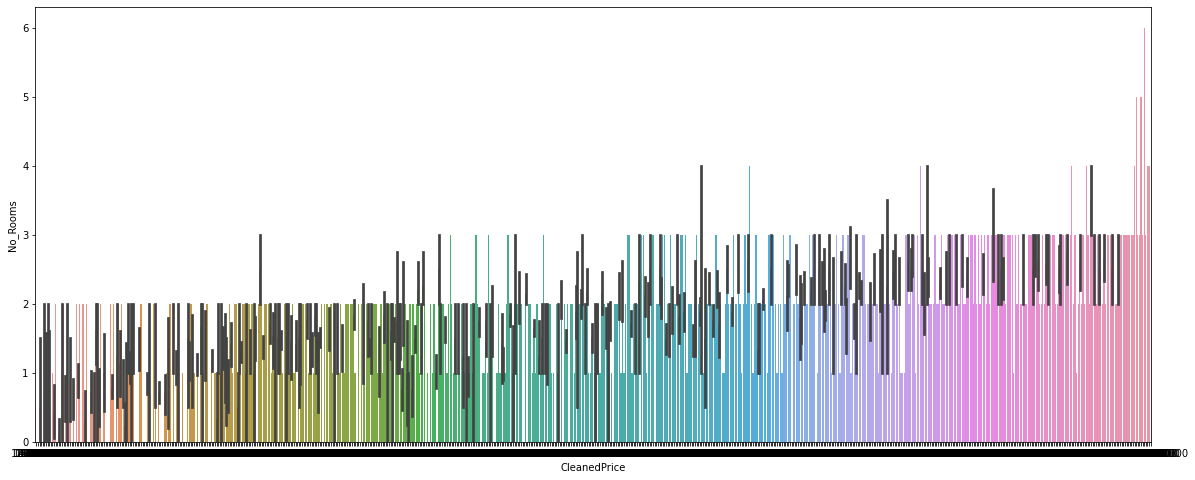

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x = 'CleanedPrice',
            y = 'No_Rooms',
            data = df1)

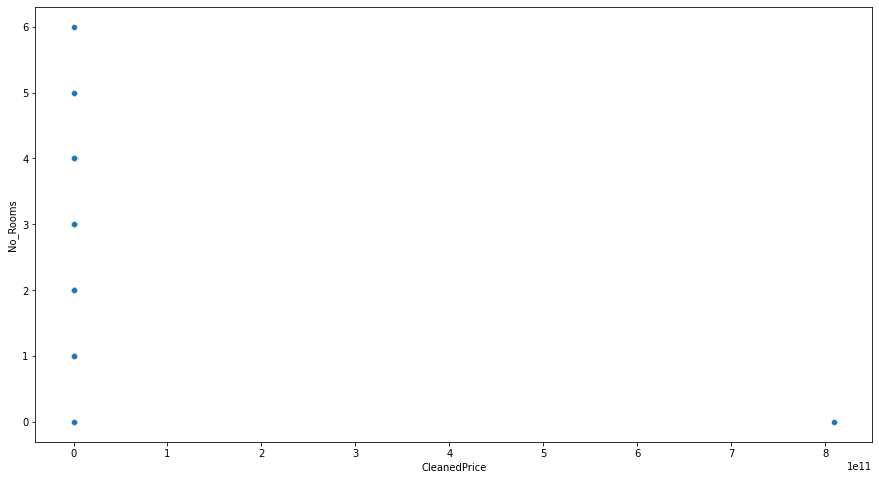

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df1, x="CleanedPrice", y="No_Rooms")
plt.show()

Pada data yang telah dilakukan visualisasi mungkin hal yang janggal yang saya temui adalah ketika melakukan visualisasi dengan scatter plot. Column CleanedPrice seperti tidak terbaca dan tidak memperoleh hasil seperti yang ditampilkan diatas. Saya masih belum menemukan solusinya.

### Nomor 3:

Analisalah kolom 'Longitude' dan 'Latitude'. Apakah ada outlier? Jika ya, nyatakanlah apa yang membuat data-data tersebut outlier. Apakah outlier-outlier pada kolom Longitude merupakan sesuatu yang bisa dijelaskan (masuk akal), atau tidak? Jelaskan.

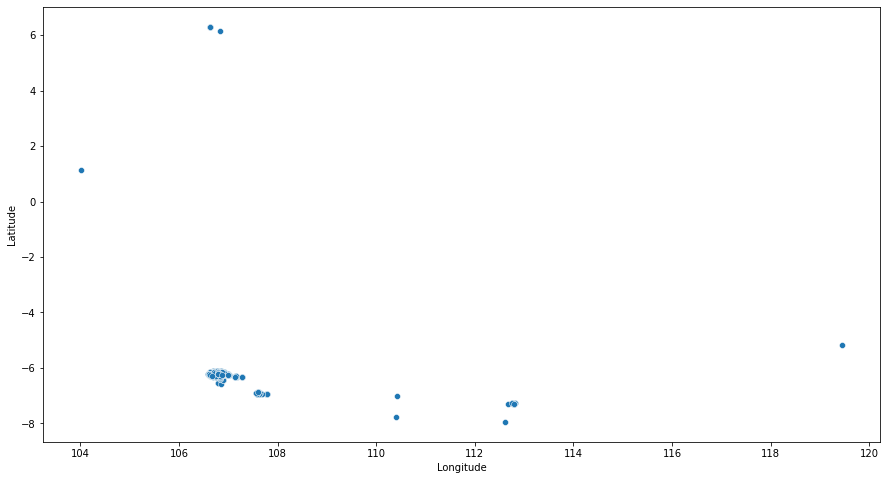

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df1, x="Longitude", y="Latitude")
plt.show()

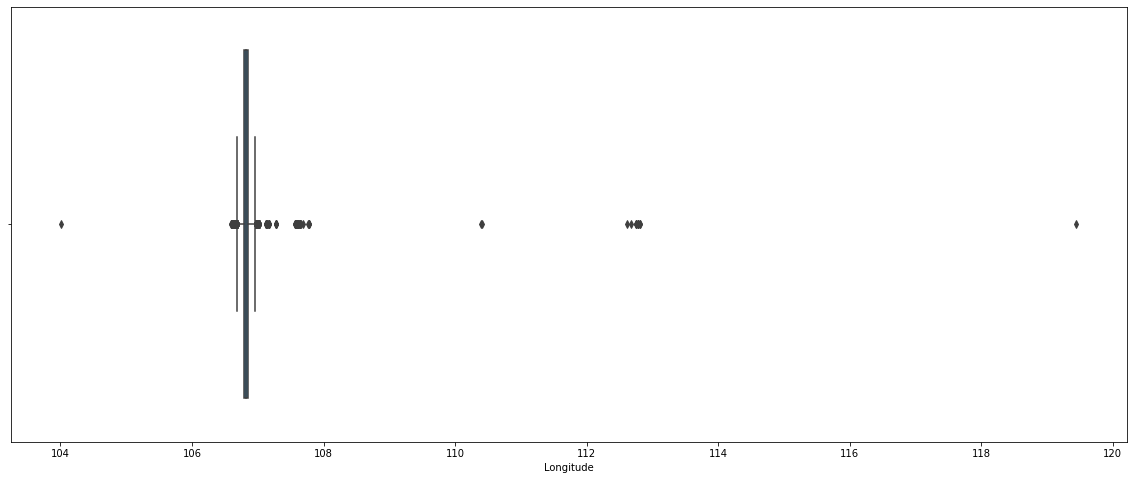

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot( x=df1["Longitude"] )
plt.show()

In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [ ]:
df1['outlier_long'] = check_outlier(data=df1, column='Longitude')
df1[df1['outlier_long'] == 'not-outlier']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000,not-outlier
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000,not-outlier
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000,not-outlier
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000,not-outlier
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5296,Casa Grande Apartment 2BR Tower Angelo,2,2,Casablanca,Jakarta Selatan,106.842672,-6.224187,1,64.0,Tower Angelo,24,IDR,350000000,350000000,not-outlier
5297,Senayan Residence 2BR Fully Furnished,2,2,Senayan,Jakarta Selatan,106.794123,-6.222613,1,90.0,Tower -,20,IDR,309000000,309000000,not-outlier
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000,not-outlier
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000,not-outlier


In [ ]:
df1.sort_values(['Longitude'], ascending = False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long
1500,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.155050,1,42.0,Tower Ashton,17,IDR,60000000,60000000,outlier
2195,Educity Residence Studio Tower Stanford,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Stanford,17,IDR,30000000,30000000,outlier
1415,Educity Residence Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Yale,16,IDR,25000000,25000000,outlier
5017,Puncak Kertajaya Apartment Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,21.0,Tower A,14,IDR,25000000,25000000,outlier
3876,Puncak Kertajaya Apartment Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,22.0,Tower A Selatan,14,IDR,25000000,25000000,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,U Residence Karawaci Studio Fully Furnished,0,1,Karawaci,Tangerang,106.607673,-6.228493,1,31.0,Tower 1,21,IDR,48000000,48000000,outlier
1369,The Habitat Karawaci Apartment Studio Fully Fu...,0,1,Karawaci,Tangerang,106.605600,-6.223600,1,30.0,Tower A,14,IDR,27000000,27000000,outlier
4790,Paragon Village Apartment 1BR Tower B,1,1,Karawaci,Tangerang,106.586901,-6.234086,1,31.0,Tower B,19,IDR,35000000,35000000,outlier
3690,Paragon Village Apartment 2BR Fully Furnished,2,1,Karawaci,Tangerang,106.586901,-6.234086,1,30.0,Tower D,19,IDR,42000000,42000000,outlier


Outliers yang terdapat pada column Longitude bisa dikatakan tidak masuk akal karena jika kita lihat dari scatter plot diatas kumpulan titik tersebut paling banyak berada pada longitude 106 sampai 108. Sehingga seharusnya longitude yang berada diantara rentang nilai tersebut bisa dikatakan non-outlier. Outlier bisa dilihat pada rentang 110 - 120. Namun dari tabel yang dibuat untuk mengecek outlier, rentang longitude 107 - 120 terdeteksi sebagai outlier. Sehingga menurut saya ada yang janggal dengan pendeteksian outlier di longitude.

### Nomor 4:

Apakah outlier-outlier pada kolom Latitude merupakan sesuatu yang bisa dijelaskan (masuk akal)? Jelaskan.

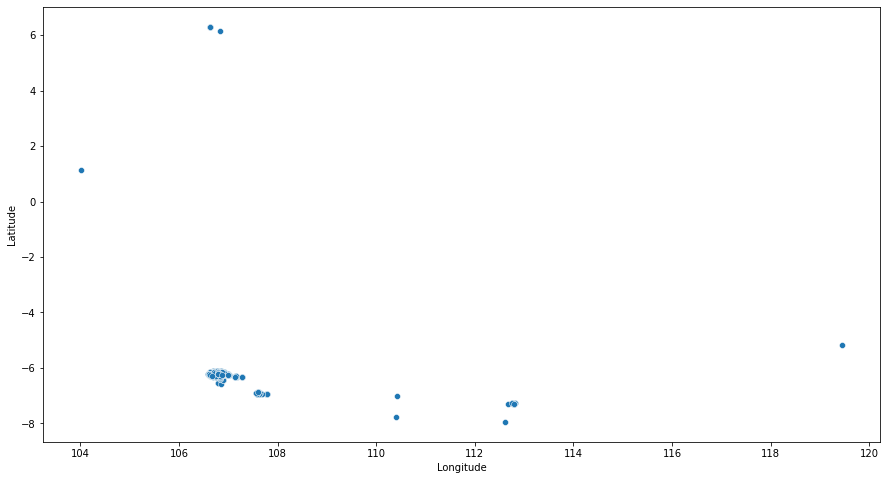

In [ ]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df1, x="Longitude", y="Latitude")
plt.show()

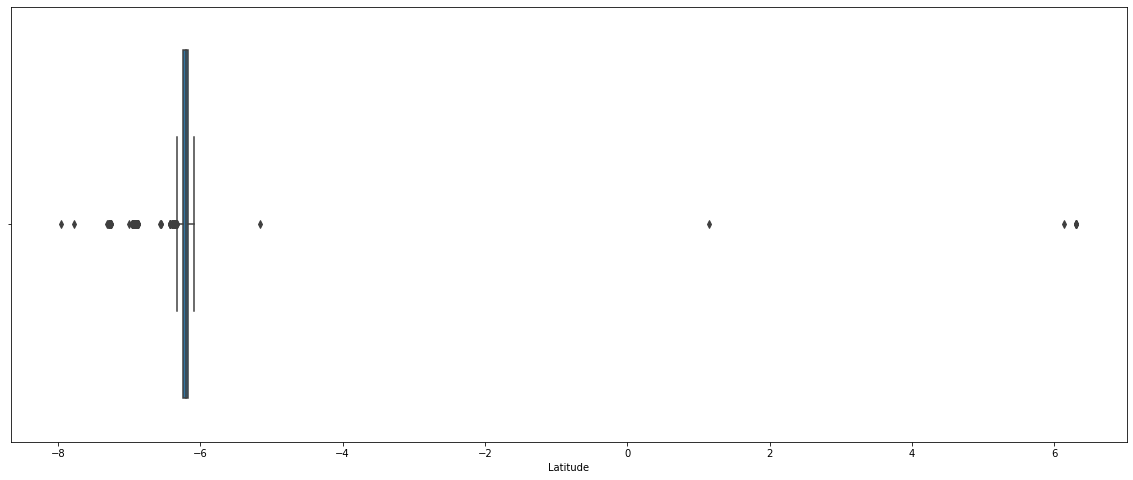

In [ ]:
plt.figure(figsize=(20,8))
sns.boxplot( x=df1["Latitude"] )
plt.show()

In [ ]:
def check_outlier(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    return ['outlier' if (x<q1-1.5*iqr or x>q3+1.5*iqr) 
                                 else 'not-outlier' for x in data[column].values]

In [ ]:
df1['outlier_lat'] = check_outlier(data=df1, column='Latitude')
df1[df1['outlier_lat'] == 'not-outlier']

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long,outlier_lat
0,Taman Sari Semanggi Apartment 1BR Tower A,1,1,Semanggi,Jakarta Selatan,106.819159,-6.226598,1,43.0,Tower A,23,IDR,96000000,96000000,not-outlier,not-outlier
1,Puri Park View Apartment 2BR Semi Furnished,2,1,Kebon Jeruk,Jakarta Barat,106.756061,-6.192081,0,35.0,Tower CB,19,IDR,30000000,30000000,not-outlier,not-outlier
2,Metro Park Residence 2BR Fully Furnished,2,1,Kedoya,Jakarta Barat,106.757651,-6.186415,1,53.0,Tower Milan,22,IDR,70000000,70000000,not-outlier,not-outlier
3,Pondok Indah Golf Apartment 2BR View Golf Area,2,2,Pondok Indah,Jakarta Selatan,106.784600,-6.272637,1,85.0,Tower -,24,IDR,576000000,576000000,not-outlier,not-outlier
4,Season City Apartment 2BR Tower C,2,1,Grogol,Jakarta Barat,106.796056,-6.153652,0,48.0,Tower C,15,IDR,32000000,32000000,not-outlier,not-outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5298,Grand Centerpoint Apartment 2BR View pool,2,1,Pekayon,Bekasi,106.993400,-6.243400,1,36.0,Tower c,14,IDR,36000000,36000000,outlier,not-outlier
5299,Roseville SOHO & Suites Studio Fully Furnished,0,1,BSD City,Tangerang,106.664000,-6.294400,1,32.0,Tower East,16,IDR,60000000,60000000,outlier,not-outlier
5300,Setiabudi Residence 2BR Fully Furnished,2,1,Setiabudi,Jakarta Selatan,106.829330,-6.216540,1,83.0,Tower B,21,IDR,250000000,250000000,not-outlier,not-outlier
5301,Apartemen Semanggi 2BR Tower 1,2,1,Slipi,Jakarta Pusat,106.801738,-6.202296,1,68.0,Tower 1,24,IDR,108000000,108000000,not-outlier,not-outlier


In [ ]:
df1.sort_values(['Longitude'], ascending = False)

,Unit_Name,No_Rooms,Bathroom,Locality,Region,Longitude,Latitude,Furnished,Area,Tower,Total_Facilities,Currency,Annual_Price,CleanedPrice,outlier_long,outlier_lat
1500,Vida View Makassar 2BR View Kolam renang garde...,2,1,Panakkukang,Makassar,119.441818,-5.155050,1,42.0,Tower Ashton,17,IDR,60000000,60000000,outlier,outlier
2195,Educity Residence Studio Tower Stanford,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Stanford,17,IDR,30000000,30000000,outlier,outlier
1415,Educity Residence Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.807241,-7.272173,1,21.0,Tower Yale,16,IDR,25000000,25000000,outlier,outlier
5017,Puncak Kertajaya Apartment Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,21.0,Tower A,14,IDR,25000000,25000000,outlier,outlier
3876,Puncak Kertajaya Apartment Studio Fully Furnished,0,1,Pakuwon City,Surabaya,112.787300,-7.287600,1,22.0,Tower A Selatan,14,IDR,25000000,25000000,outlier,outlier
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,U Residence Karawaci Studio Fully Furnished,0,1,Karawaci,Tangerang,106.607673,-6.228493,1,31.0,Tower 1,21,IDR,48000000,48000000,outlier,not-outlier
1369,The Habitat Karawaci Apartment Studio Fully Fu...,0,1,Karawaci,Tangerang,106.605600,-6.223600,1,30.0,Tower A,14,IDR,27000000,27000000,outlier,not-outlier
4790,Paragon Village Apartment 1BR Tower B,1,1,Karawaci,Tangerang,106.586901,-6.234086,1,31.0,Tower B,19,IDR,35000000,35000000,outlier,not-outlier
3690,Paragon Village Apartment 2BR Fully Furnished,2,1,Karawaci,Tangerang,106.586901,-6.234086,1,30.0,Tower D,19,IDR,42000000,42000000,outlier,not-outlier


Untuk yang satu ini menurut saya juga memiliki kemiripan dengan Longitude diatas.

### Nomor 5:

Buatlah simple Linear Regression dengan ketentuan berikut:

1. Kolom prediktor: Area, Total_Facilities, No_Rooms
2. Kolom target: CleanedPrice
3. Train Test Split dilakukan dengan 80% Train, 20% Test
Laporkanlah RMSE dan R2 Score dari model yang kalian buat, jika dievaluasi pada Test Set.

In [ ]:
from sklearn import datasets

In [ ]:
df1.columns

Index(['Unit_Name', 'No_Rooms', 'Bathroom', 'Locality', 'Region', 'Longitude',
       'Latitude', 'Furnished', 'Area', 'Tower', 'Total_Facilities',
       'Currency', 'Annual_Price', 'CleanedPrice', 'outlier_long',
       'outlier_lat'],
      dtype='object')

In [ ]:
x = df1[['Area', 'Total_Facilities','No_Rooms' ]]
y = df1[['CleanedPrice']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [ ]:
x_train

,Area,Total_Facilities,No_Rooms
1892,27.0,16,0
2073,48.0,23,1
5260,22.0,20,0
5247,58.0,13,2
1330,42.0,21,1
...,...,...,...
1080,23.0,20,0
1928,26.0,19,1
668,41.0,16,2
1961,89.0,21,3


In [ ]:
y_train

,CleanedPrice
1892,28000000
2073,90000000
5260,37000000
5247,65000000
1330,96000000
...,...
1080,36000000
1928,56000000
668,60000000
1961,192000000


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(x_train, y_train)

LinearRegression()

#Part 4: Test the Model on Test Set

In [ ]:
y_prediction = model.predict(x_test)

In [ ]:
y_prediction

array([[ 5.70063571e+08],
       [ 1.71476246e+08],
       [ 1.88401680e+07],
       ...,
       [-3.88986307e+08],
       [ 3.04684119e+08],
       [ 1.37395006e+08]])

In [ ]:
y_test

,CleanedPrice
3702,60000000
3320,372000000
2264,200000000
128,55000000
2540,240000000
...,...
144,90000000
404,27500000
3854,40000000
145,50000000


In [ ]:
ax = sns.scatterplot(y_prediction, y_test)
ax.set_xlabel('Prediction')
ax.set_ylabel('Actual Test Data')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


ValueError: ignored

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [ ]:
print('TEST SET EVALUATION')
print('===================')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_prediction)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_prediction))}')
print(f'R Squared Score: {r2_score(y_test, y_prediction)}')

TEST SET EVALUATION
Mean Absolute Error: 293092464.02686065
Root Mean Squared Error: 367050452.42351156
R Squared Score: -12.848926304210371


In [ ]:
training_prediction = model.predict(x_train)
print('TRAIN SET EVALUATION')
print('===================')
print(f'Mean Absolute Error: {mean_absolute_error(y_train, training_prediction)}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, training_prediction))}')
print(f'R Squared Score: {r2_score(y_train, training_prediction)}')

TRAIN SET EVALUATION
Mean Absolute Error: 493347069.56546783
Root Mean Squared Error: 12430676357.82854
R Squared Score: 0.0005198705045943441
